In [1]:

import pandas as pd
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,KFold
from sklearn.metrics import accuracy_score, roc_curve,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from learn_curving_fold import plot_learning_curves

In [3]:
train_error = [[],[],[],[],[]]
test_error = [[],[],[],[],[]]
train_error_up = [[],[],[],[],[]]
test_error_up = [[],[],[],[],[]]

In [5]:
model = RandomForestClassifier(n_estimators=100, criterion = 'gini',random_state = 42,max_depth = 5)


# fold 1


In [6]:
fold_train = pd.read_csv('models_output/1-fold_train_z.csv')
fold_test = pd.read_csv('models_output/1-fold_test_z.csv')
#rename
fold_train = fold_train.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
fold_test = fold_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# upsampling train
one_messages_1 = fold_train[fold_train["Class"] == 1 ]
zero_messages_1 =fold_train[fold_train["Class"] == 0]
one_message_1_upsample = resample(one_messages_1,
             replace=True,
             n_samples=len(zero_messages_1),
             random_state=42)
print(one_messages_1.shape,zero_messages_1.shape)
fold_train = pd.concat([one_message_1_upsample,zero_messages_1])
x_1 = fold_train.drop(columns=['Class'])
y_1 = fold_train['Class']

x_1_test = fold_test.drop(columns=["Class"])
y_1_test = fold_test['Class']
print(x_1.shape)

#train_error[0],test_error[0] = plot_learning_curves(x_1,y_1,x_1_test,y_1_test,clf = model)
#print(train_error,test_error)
del (fold_train,fold_test)


(1168, 24) (36279, 24)
(72558, 23)


In [7]:
rng = [int(i) for i in np.linspace(0, x_1.shape[0], 20)][1:]
print(len(rng),len(train_error[0]))

19 19


In [9]:
#upsampling validation
fold_test = pd.read_csv('models_output/1-fold_test_z.csv')

one_messages_1_test = fold_test[fold_test["Class"] == 1 ]
zero_messages_1_test =fold_test[fold_test["Class"] == 0]
one_message_1_test_upsample = resample(one_messages_1_test,
             replace=True,
             n_samples=len(zero_messages_1_test),
             random_state=42)
fold_test = pd.concat([one_message_1_test_upsample,zero_messages_1_test])
x_1_test = fold_test.drop(columns=["Class"])
y_1_test = fold_test['Class']
print(one_message_1_test_upsample.shape,zero_messages_1_test.shape)

#train_error_up[0],test_error_up[0] = plot_learning_curves(x_1,y_1,x_1_test,y_1_test,clf = model)
print(train_error_up,test_error_up)
del (fold_test)

(9086, 24) (9086, 24)
[[], [], [], [], []] [[], [], [], [], []]


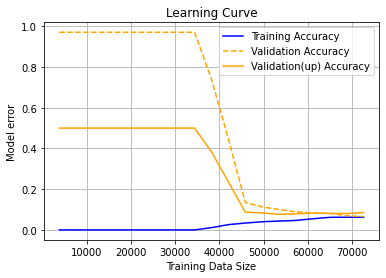

In [9]:
plt.plot(rng, train_error[0], color='blue', label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rng, test_error[0], color='orange',linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.plot(rng, test_error_up[0], color='orange',linestyle='-', label='Validation(up) Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model error')
plt.grid()
plt.legend(loc='upper right')


# fold 2

In [10]:
fold_train = pd.read_csv('models_output/2-fold_train_z.csv')
fold_test = pd.read_csv('models_output/2-fold_test_z.csv')
#rename
fold_train = fold_train.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
fold_test = fold_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# upsampling train
one_messages_2 = fold_train[fold_train["Class"] == 1 ]
zero_messages_2 =fold_train[fold_train["Class"] == 0]
one_message_2_upsample = resample(one_messages_2,
             replace=True,
             n_samples=len(zero_messages_2),
             random_state=42)
fold_train = pd.concat([one_message_2_upsample,zero_messages_2])
x_2 = fold_train.drop(columns=['Class'])
y_2 = fold_train['Class']

x_2_test = fold_test.drop(columns=["Class"])
y_2_test = fold_test['Class']


train_error[1],test_error[1] = plot_learning_curves(x_2,y_2,x_2_test,y_2_test,clf = model)
#print(train_error,test_error)
del (fold_train,fold_test)


In [11]:
rng = [int(i) for i in np.linspace(0, x_2.shape[0], 20)][1:]
print(len(rng),len(train_error[0]))

19 19


In [12]:
#upsampling validation
fold_test = pd.read_csv('models_output/2-fold_test_z.csv')

one_messages_2_test = fold_test[fold_test["Class"] == 1 ]
zero_messages_2_test =fold_test[fold_test["Class"] == 0]
one_message_2_test_upsample = resample(one_messages_2_test,
             replace=True,
             n_samples=len(zero_messages_2_test),
             random_state=42)
fold_test = pd.concat([one_message_2_test_upsample,zero_messages_2_test])
x_2_test = fold_test.drop(columns=["Class"])
y_2_test = fold_test['Class']


train_error_up[1],test_error_up[1] = plot_learning_curves(x_2,y_2,x_2_test,y_2_test,clf = model)
del (fold_test)

c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, Futu

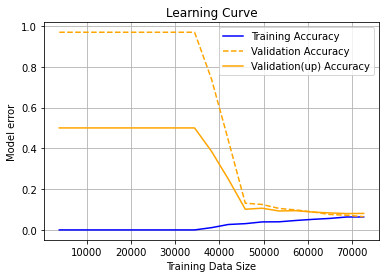

In [13]:
plt.plot(rng, train_error[1], color='blue', label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rng, test_error[1], color='orange',linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.plot(rng, test_error_up[1], color='orange',linestyle='-', label='Validation(up) Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model error')
plt.grid()
plt.legend(loc='upper right')


# fold 3

In [14]:
fold_train = pd.read_csv('models_output/3-fold_train_z.csv')
fold_test = pd.read_csv('models_output/3-fold_test_z.csv')
#rename
fold_train = fold_train.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
fold_test = fold_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# upsampling train
one_messages_3 = fold_train[fold_train["Class"] == 1 ]
zero_messages_3 =fold_train[fold_train["Class"] == 0]
one_message_3_upsample = resample(one_messages_3,
             replace=True,
             n_samples=len(zero_messages_3),
             random_state=42)
fold_train = pd.concat([one_message_3_upsample,zero_messages_3])
x_3 = fold_train.drop(columns=['Class'])
y_3 = fold_train['Class']

x_3_test = fold_test.drop(columns=["Class"])
y_3_test = fold_test['Class']


train_error[2],test_error[2] = plot_learning_curves(x_3,y_3,x_3_test,y_3_test,clf = model)
#print(train_error,test_error)
del (fold_train,fold_test)

In [15]:
rng = [int(i) for i in np.linspace(0, x_3.shape[0], 20)][1:]
print(len(rng),len(train_error[0]))

19 19


In [16]:
#upsampling validation
fold_test = pd.read_csv('models_output/3-fold_test_z.csv')

one_messages_3_test = fold_test[fold_test["Class"] == 1 ]
zero_messages_3_test =fold_test[fold_test["Class"] == 0]
one_message_3_test_upsample = resample(one_messages_3_test,
             replace=True,
             n_samples=len(zero_messages_3_test),
             random_state=42)
fold_test = pd.concat([one_message_3_test_upsample,zero_messages_3_test])
x_3_test = fold_test.drop(columns=["Class"])
y_3_test = fold_test['Class']


train_error_up[2],test_error_up[2] = plot_learning_curves(x_3,y_3,x_3_test,y_3_test,clf = model)
del (fold_test)

c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, Futu

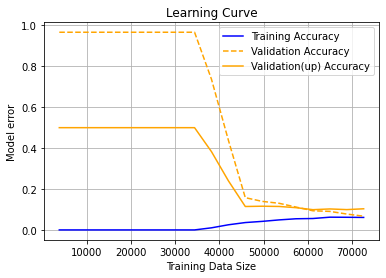

In [17]:
plt.plot(rng, train_error[2], color='blue', label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rng, test_error[2], color='orange',linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.plot(rng, test_error_up[2], color='orange',linestyle='-', label='Validation(up) Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model error')
plt.grid()
plt.legend(loc='upper right')

# fold 4


In [18]:
fold_train = pd.read_csv('models_output/4-fold_train_z.csv')
fold_test = pd.read_csv('models_output/4-fold_test_z.csv')
#rename
fold_train = fold_train.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
fold_test = fold_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# upsampling train
one_messages_4 = fold_train[fold_train["Class"] == 1 ]
zero_messages_4 =fold_train[fold_train["Class"] == 0]
one_message_4_upsample = resample(one_messages_4,
             replace=True,
             n_samples=len(zero_messages_4),
             random_state=42)
fold_train = pd.concat([one_message_4_upsample,zero_messages_4])
x_4 = fold_train.drop(columns=['Class'])
y_4 = fold_train['Class']

x_4_test = fold_test.drop(columns=["Class"])
y_4_test = fold_test['Class']


train_error[3],test_error[3] = plot_learning_curves(x_4,y_4,x_4_test,y_4_test,clf = model)
#print(train_error,test_error)
del (fold_train,fold_test)

In [19]:
rng = [int(i) for i in np.linspace(0, x_4.shape[0], 20)][1:]
print(len(rng),len(train_error[0]))

19 19


In [20]:
#upsampling validation
fold_test = pd.read_csv('models_output/4-fold_test_z.csv')

one_messages_4_test = fold_test[fold_test["Class"] == 1 ]
zero_messages_4_test =fold_test[fold_test["Class"] == 0]
one_message_4_test_upsample = resample(one_messages_4_test,
             replace=True,
             n_samples=len(zero_messages_4_test),
             random_state=42)
fold_test = pd.concat([one_message_4_test_upsample,zero_messages_4_test])
x_4_test = fold_test.drop(columns=["Class"])
y_4_test = fold_test['Class']


train_error_up[3],test_error_up[3] = plot_learning_curves(x_4,y_4,x_4_test,y_4_test,clf = model)
del (fold_test)

c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, Futu

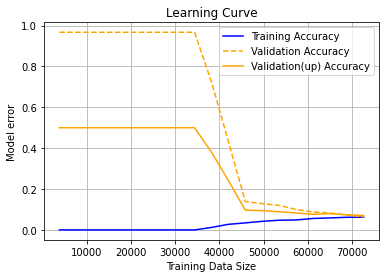

In [21]:
plt.plot(rng, train_error[3], color='blue', label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rng, test_error[3], color='orange',linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.plot(rng, test_error_up[3], color='orange',linestyle='-', label='Validation(up) Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model error')
plt.grid()
plt.legend(loc='upper right')

# fold 5

In [22]:
fold_train = pd.read_csv('models_output/5-fold_train_z.csv')
fold_test = pd.read_csv('models_output/5-fold_test_z.csv')
#rename
fold_train = fold_train.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
fold_test = fold_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# upsampling train
one_messages_5 = fold_train[fold_train["Class"] == 1 ]
zero_messages_5 =fold_train[fold_train["Class"] == 0]
one_message_5_upsample = resample(one_messages_5,
             replace=True,
             n_samples=len(zero_messages_5),
             random_state=42)
fold_train = pd.concat([one_message_5_upsample,zero_messages_5])
x_5 = fold_train.drop(columns=['Class'])
y_5 = fold_train['Class']

x_5_test = fold_test.drop(columns=["Class"])
y_5_test = fold_test['Class']


train_error[4],test_error[4] = plot_learning_curves(x_5,y_5,x_5_test,y_5_test,clf = model)
#print(train_error,test_error)
del (fold_train,fold_test)

In [23]:
rng = [int(i) for i in np.linspace(0, x_5.shape[0], 20)][1:]
print(len(rng),len(train_error[0]))

19 19


In [24]:
#upsampling validation
fold_test = pd.read_csv('models_output/5-fold_test_z.csv')

one_messages_5_test = fold_test[fold_test["Class"] == 1 ]
zero_messages_5_test =fold_test[fold_test["Class"] == 0]
one_message_5_test_upsample = resample(one_messages_5_test,
             replace=True,
             n_samples=len(zero_messages_5_test),
             random_state=42)
fold_test = pd.concat([one_message_5_test_upsample,zero_messages_5_test])
x_5_test = fold_test.drop(columns=["Class"])
y_5_test = fold_test['Class']


train_error_up[4],test_error_up[4] = plot_learning_curves(x_5,y_5,x_5_test,y_5_test,clf = model)
del (fold_test)

c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, FutureWarning)
c:\Users\USER\Envs\KD\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Unnamed0

  warnings.warn(message, Futu

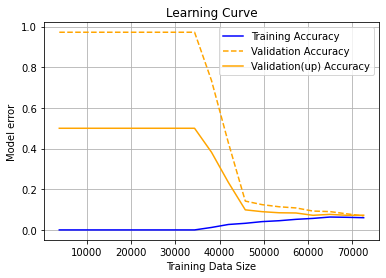

In [25]:
plt.plot(rng, train_error[4], color='blue', label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rng, test_error[4], color='orange',linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.plot(rng, test_error_up[4], color='orange',linestyle='-', label='Validation(up) Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model error')
plt.grid()
plt.legend(loc='upper right')

In [26]:
#for i in range (0,5):
#    print('train_error:',train_error[i][10],'test_error:',test_error[i][10])
print(test_error)

[[0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.9705191198461867, 0.7403332621234779, 0.4468062379833369, 0.1346934415723136, 0.1130100405896176, 0.10008545182653279, 0.08854945524460585, 0.08310190130314035, 0.08107242042298654, 0.06985686819055757, 0.06537064729758599], [0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.9690237128818628, 0.7400128177739799, 0.4385814996795557, 0.13106173894466994, 0.12465285195471053, 0.10531937620166631, 0.097735526596881, 0.08790856654560991, 0.07573168126468703, 0.07199316385387737, 0.06483657338175604], [0.966673787652211, 0.966673787652211, 0.966673787652211, 0.966673787652211, 0.966673787652211, 0.966673787652211, 0.966673787652211, 0.966673787652211, 0.966673787652211, 0.7369151890621662, 0.43879512924588765, 0.15765861

In [27]:
total_train_loss_pd = pd.DataFrame()
total_test_loss_pd = pd.DataFrame()
total_test_loss_up_pd = pd.DataFrame()
for i in range(len(train_error)):
    total_train_loss_pd['{}_fold'.format(i+1)] = train_error[i]
    total_test_loss_pd['{}_fold'.format(i+1)] = test_error[i]
    total_test_loss_up_pd['{}_fold'.format(i+1)]= test_error_up[i]

total_train_loss_pd['average'] = total_train_loss_pd.sum(axis = 1)/5
total_test_loss_pd['average'] = total_test_loss_pd.sum(axis = 1)/5
total_test_loss_up_pd['average'] = total_test_loss_up_pd.sum(axis = 1)/5

print('total_train_loss',list(total_train_loss_pd['average']),'\n\n','total_test_loss',list(total_test_loss_pd['average']),'\n\n','total_test_loss_up',list(total_test_loss_up_pd['average']))



total train error: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011313774037679926, 0.02635307342654717, 0.03343170186428242, 0.04079516684175426, 0.04498598752848171, 0.04962043734827297, 0.05503991479542338, 0.06048434021964537, 0.06225721291053243, 0.061759947734078245] 

 total test error: [0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.9691512995517156, 0.73539276403956, 0.4370738833553357, 0.14082763850372035, 0.12606546120195192, 0.11388835455506459, 0.1012413609935507, 0.08897869526033333, 0.0840651604637375, 0.07447295787672704, 0.06584210431307391] 

 total test error upsampling: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3830037488326866, 0.2400371827282025, 0.09967992508185165, 0.0979892816806244, 0.09145587784624394, 0.0897419498615164, 0.08332590615954785, 0.08458292492684823, 0.0811541433271629, 0.08250909321011228]


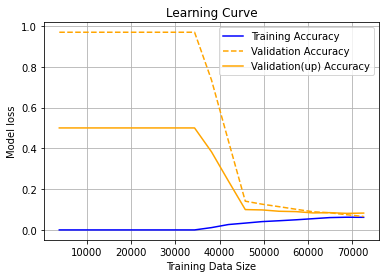

In [28]:
plt.plot(rng, total_error_train, color='blue', label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rng, total_error_test, color='orange',linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.plot(rng, total_error_test_up, color='orange',linestyle='-', label='Validation(up) Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model loss')
plt.grid()
plt.legend(loc='upper right')

In [29]:
train_set = pd.read_csv('models_output/train_set_z.csv')

one_messages_train = train_set[train_set["Class"] == 1 ]
zero_messages_train =train_set[train_set["Class"] == 0]
one_message_train_upsample = resample(one_messages_train,
             replace=True,
             n_samples=len(zero_messages_train),
             random_state=42)
train_set = pd.concat([one_message_train_upsample,zero_messages_train])
x_train_set = train_set.drop(columns=["Class"])
y_train_set = train_set["Class"]


model.fit(x_train_set,y_train_set)

RandomForestClassifier(max_depth=5, random_state=42)